In [4]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../')
from os.path import join, isdir
import numpy as np
import cv2
from cselect import color as cs
from time import time

from mvpose.data import umpm

root = join(Settings['data_root'], 'pak')
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']

X, Y, Calib = umpm.get(root, 'p2_ball_1', user, pwd)

UMPM


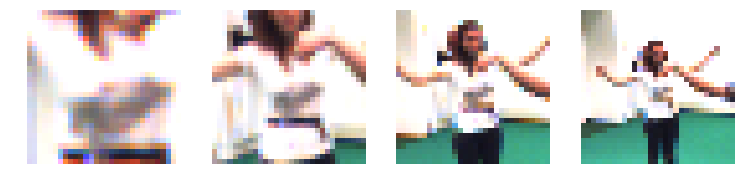

In [171]:
def get_patch(im, x, y, patches=[15, 30, 50, 70], s=30):
    Patches = np.zeros((len(patches), s, s, 3), 'uint8')
    h, w, _ = im.shape
    for pid, p in enumerate(patches):
        left = max(x - p, 0)
        top = max(y - p, 0)
        right = min(x + p, w-1)
        bottom = min(y + p, h-1)
        patch = im[top : bottom, left : right]
        patch = cv2.resize(patch, (s, s))
        Patches[pid] = patch
    return Patches
        
im = X[0][0]
x = 300; y = 100

fig = plt.figure(figsize=(16,10))

for idx, img in enumerate(get_patch(im, x, y, s=30)):
    ax = fig.add_subplot(1, 5, idx+1)
    ax.imshow(img)
    ax.axis('off')
    
plt.show()

(28, 4)
elapsed 0.3705167770385742


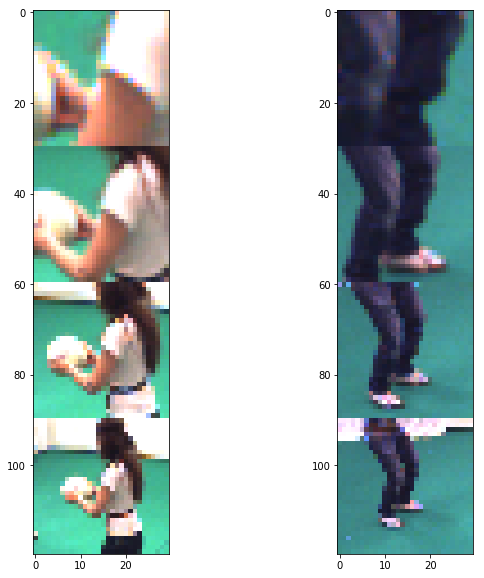

In [182]:
from numpy.random import randint
from random import random
from time import time

print(Y[0].shape)

def get_joint(X, Y, Calib, same_person=True):
    n_frames = len(X[0])
    if same_person:
        player1 = randint(0, 2)  # 1 or 2
        player2 = player1
    else:
        if random() > 0.5:
            player1 = 0
            player2 = 1
        else:
            player1 = 1
            player2 = 0
    cid1 = randint(0, len(X))
    cid2 = randint(0, len(X))
    frame1 = randint(0, n_frames-1)
    frame2 = randint(0, n_frames-1)
    jid1 = randint(0, 14) + 14 * player1
    jid2 = randint(0, 14) + 14 * player2
    im1 = X[cid1][frame1]
    im2 = X[cid2][frame2]

    y1 = Y[frame1][jid1][0:3]
    y2 = Y[frame2][jid2][0:3]
    x1, y1 = np.squeeze(
        Calib[cid1].projectPoints(np.array([y1]))).astype('int32')
    x2, y2 = np.squeeze(
        Calib[cid2].projectPoints(np.array([y2]))).astype('int32')
    
    # noise
    noise_x1, noise_x2, noise_y1, noise_y2 = randint(-5, 5, size=4)
    x1 += noise_x1
    x2 += noise_x2
    y1 += noise_y1
    y2 += noise_y2
    return get_patch(im1, x1, y1), get_patch(im2, x2, y2)

_start = time()
im1, im2 = get_joint(X, Y, Calib, same_person=False)
_end = time()
print('elapsed', _end - _start)

im1 = np.concatenate(im1, axis=0)
im2 = np.concatenate(im2, axis=0)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot(121).imshow(im1)
fig.add_subplot(122).imshow(im2)

plt.show()

In [178]:
from random import random

random()

0.026440355521718195